## Instalación de dependencias

In [1]:
#!pip install -q nltk pandas matplotlib seaborn



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importación de librerías necesarias

In [1]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, pos_tag_sents
from nltk.corpus import wordnet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías importadas correctamente")
print("✓ Configuración SSL aplicada")

✓ Librerías importadas correctamente
✓ Configuración SSL aplicada


## Recursos necesarios de NLTK

In [3]:
print("Cargando recursos de NLTK...\n")

try:
    nltk.data.find('tokenizers/punkt_tab') # en inglés / como se está usando una diferente vesrión de NLTK entonces se cambia a punk_tab
except LookupError:
    nltk.download('punkt_tab', quiet=True)

try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng') # inglés
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng', quiet=True)

print("✓ Recursos de NLTK listos")

print("\n" + "="*60)
print("¡Listo para comenzar con el POS Tagging!")
print("="*60)

Cargando recursos de NLTK...

✓ Recursos de NLTK listos

¡Listo para comenzar con el POS Tagging!


## POS Tagging NLTK con Spotify_clean02.csv

In [4]:
# carga de spotify_clean02.csv
df = pd.read_csv("../data/processed/spotify_clean02.csv", sep=';')

## Primero una prueba con una fila

In [5]:
# Tomar una canción de ejemplo (la primera fila)
sentence = df['text'].iloc[0]

print("ORIGINAL:")
print(f'"{sentence}"\n')

# Paso 1: Tokenizar la oración
tokens = word_tokenize(sentence)
print("TOKENS:")
print(tokens)
print()

# Paso 2: Realizar POS tagging con NLTK
pos_tags_nltk = pos_tag(tokens)
print("POS TAGGING CON NLTK:")
for word, tag in pos_tags_nltk:
    print(f"{word:15} → {tag}")

ORIGINAL:
"I always evaded the truth Continued to lose a piece of my mind at a time They said I was in for the win But It's not guaranteed when you kill to get in I pray to the moon she's greater than I Blood for blood yea eye for an eye If it's too insidious Then don't consider this something you should ever fucking try no I know I know I know It's not gonna take my pain away I know I know I know But you're going to try it anyway Tonight when I can't sleep The memories that haunt me Your spirit is present My thoughts manifest it They call it a séance I call it what made us I summoned a lover The heat of a twin flame Something is telling me fight Am hearing this right 'Cause I'm hearing it every night But I don't know where to begin 'Cause calling your name they say it's a sin This crucifix on my neck is burning my chest I know that I'm damned at best yeah Tonight when I can't sleep The memories that haunt me Your spirit is present My thoughts manifest it They call it a séance I call i

## Limpieza / Tokenización / POS Tagging con el df completo

In [6]:
# Múltiples oraciones con NLTK - Dataset completo
print("\n" + "="*60)
print("ANALIZANDO MÚLTIPLES CANCIONES CON NLTK")
print("="*60 + "\n")

# Procesar todas las canciones (o las primeras N si quieres ver ejemplos)
n_canciones = len(df)  # Cambia a 10 si solo quieres ver ejemplos

for idx in range(n_canciones):
    sentence = df['text'].iloc[idx]
    emotion = df['emotion'].iloc[idx]

    print(f"Canción {idx + 1} - Emoción: {emotion}")
    print(f"Texto: {sentence[:100]}...")  # Muestra solo los primeros 100 caracteres

    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)

    for word, tag in pos_tags:
        print(f"  {word:15} → {tag}")
    print()

    # Mostrar solo las primeras 5 canciones como ejemplo
    if idx == 4:
        print(f"\n... (procesando las {n_canciones - 5} canciones restantes en segundo plano)")
        break

print(f"\n✓ Total procesadas: {n_canciones} canciones")


ANALIZANDO MÚLTIPLES CANCIONES CON NLTK

Canción 1 - Emoción: anger
Texto: I always evaded the truth Continued to lose a piece of my mind at a time They said I was in for the ...
  I               → PRP
  always          → RB
  evaded          → VBD
  the             → DT
  truth           → NN
  Continued       → VBD
  to              → TO
  lose            → VB
  a               → DT
  piece           → NN
  of              → IN
  my              → PRP$
  mind            → NN
  at              → IN
  a               → DT
  time            → NN
  They            → PRP
  said            → VBD
  I               → PRP
  was             → VBD
  in              → IN
  for             → IN
  the             → DT
  win             → NN
  But             → CC
  It              → PRP
  's              → VBZ
  not             → RB
  guaranteed      → VBN
  when            → WRB
  you             → PRP
  kill            → VBP
  to              → TO
  get             → VB
  in              → IN


## Gráfico / Análisis Morfológico

Procesando canciones...
✓ 49998 canciones procesadas



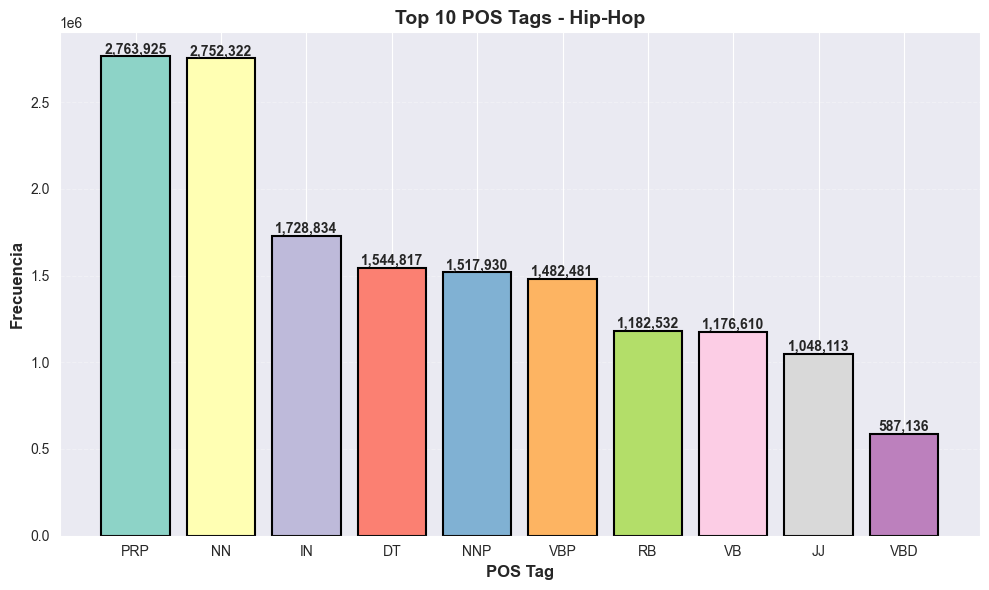

📊 Total palabras: 20,048,037


In [7]:
# Procesar y recolectar POS tags
print("Procesando canciones...")
all_pos_tags = []
puntuacion = {'.', ',', '!', '?', ';', ':', '"', "'", '(', ')', '-', '--', '...', '`', '``', "''"}

for idx in range(len(df)):
    tokens = word_tokenize(df['text'].iloc[idx])
    pos_tags = pos_tag(tokens)
    all_pos_tags.extend([tag for word, tag in pos_tags if word not in puntuacion])

print(f"✓ {len(df)} canciones procesadas\n")

# Top 10 y gráfico
pos_counts = Counter(all_pos_tags)
top_10 = pos_counts.most_common(10)
names = [t[0] for t in top_10]
values = [t[1] for t in top_10]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(names, values, color=plt.cm.Set3(range(10)), edgecolor='black', linewidth=1.5)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('POS Tag', fontsize=12, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax.set_title('Top 10 POS Tags - Hip-Hop', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [9]:
print(f" Total palabras: {len(all_pos_tags):,}")
print(f" Tipos diferentes de POS tags: {len(pos_counts)}\n")

print("TOP 10 POS tags más frecuentes:")
for tag, count in top_10:
    percentage = (count / len(all_pos_tags)) * 100
    print(f"  {tag:10} → {count:,} ({percentage:.2f}%)")

# Análisis por categoría gramatical principal
sustantivos = sum([count for tag, count in pos_counts.items() if tag.startswith('NN')])
verbos = sum([count for tag, count in pos_counts.items() if tag.startswith('VB')])
adjetivos = sum([count for tag, count in pos_counts.items() if tag.startswith('JJ')])
adverbios = sum([count for tag, count in pos_counts.items() if tag.startswith('RB')])

print(f"\n Distribución por categoría:")
print(f"  Sustantivos: {sustantivos:,} ({sustantivos/len(all_pos_tags)*100:.2f}%)")
print(f"  Verbos:      {verbos:,} ({verbos/len(all_pos_tags)*100:.2f}%)")
print(f"  Adjetivos:   {adjetivos:,} ({adjetivos/len(all_pos_tags)*100:.2f}%)")
print(f"  Adverbios:   {adverbios:,} ({adverbios/len(all_pos_tags)*100:.2f}%)")

 Total palabras: 20,048,037
 Tipos diferentes de POS tags: 39

TOP 10 POS tags más frecuentes:
  PRP        → 2,763,925 (13.79%)
  NN         → 2,752,322 (13.73%)
  IN         → 1,728,834 (8.62%)
  DT         → 1,544,817 (7.71%)
  NNP        → 1,517,930 (7.57%)
  VBP        → 1,482,481 (7.39%)
  RB         → 1,182,532 (5.90%)
  VB         → 1,176,610 (5.87%)
  JJ         → 1,048,113 (5.23%)
  VBD        → 587,136 (2.93%)

 Distribución por categoría:
  Sustantivos: 4,849,934 (24.19%)
  Verbos:      4,268,245 (21.29%)
  Adjetivos:   1,121,156 (5.59%)
  Adverbios:   1,203,004 (6.00%)
